## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
#%matplotlib notebook

In [2]:

#Find the files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Merge datasets
mouse_study_df = pd.merge(mouse_metadata_df, study_results_df, on='Mouse ID', how='outer')

mouse_study_df.head()

# Mpouse Study Preview 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
#Total Number of Mice
Total_Mice = len(mouse_study_df["Mouse ID"].unique())
Total_Mice_df = pd.DataFrame({"Number of Mice":[Total_Mice]})
Total_Mice_df

,Number of Mice
0,249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Find duplicates 

mouse_study_df[mouse_study_df.duplicated(keep=False)]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [10]:
#drop the duplicate mouse

mouse_study_clean_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] != 'g989']
mouse_study_clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
#mouse_study["908"]
#est

In [12]:
# Checking the number of mice in the clean DataFrame.
#Thisisnt right 
Total_Mice = len(mouse_study_clean_df["Mouse ID"].unique())
Total_Mice_Clean_df = pd.DataFrame({"Number of Mice":[Total_Mice]})
Total_Mice_Clean_df

,Number of Mice
0,248


## Summary Statistics

In [13]:
#Drugs by average tumor volume
mouse_study_clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#Summary Stats - long version 
Mean = mouse_study_clean_df.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
median = mouse_study_clean_df.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
varience = mouse_study_clean_df.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
Std_dev = mouse_study_clean_df.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
sem = mouse_study_clean_df.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']
Summary_Stats_df = pd.DataFrame({
            "Mean" : Mean, 
            "Median": median, 
            "Variance": varience ,
            "Standard Deviation": Std_dev,
            "SEM ": sem
})
Summary_Stats_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Groupby to get aggs

mouse_study_clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" :['mean','median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [16]:

#Get durg regimens
mouse_study_clean_df["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

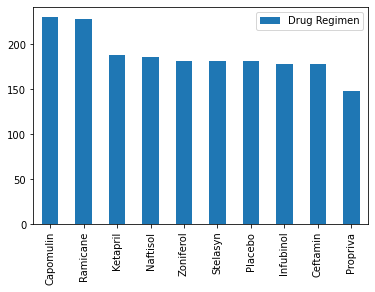

In [17]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

# a=b  b is copied in a 
# b =a  a is copied b 

plot_mice_df = pd.DataFrame(mouse_study_clean_df["Drug Regimen"].value_counts()) 
plot_mice_df.plot(kind = "bar")

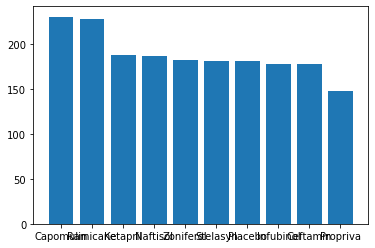

In [18]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
counts = mouse_study_clean_df["Drug Regimen"].value_counts()
plt.bar(counts.index.values,counts.values)
plt.show()

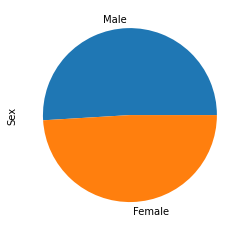

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plot_mice_df = mouse_study_clean_df["Sex"].value_counts()
plot_mice_df.plot(kind = "pie")


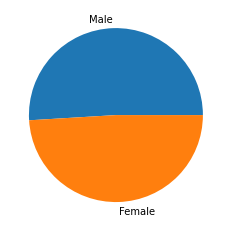

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = mouse_study_clean_df["Sex"].value_counts()
plt.pie(counts.values,labels=counts.index.values)
plt.show()


## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#1) Get df by mouse ID , get last timepoint (=final tumor val)use max function to capture final timepoint, no matter where it ends

Drugs = mouse_study_clean_df.loc[(mouse_study_clean_df["Drug Regimen"] == "Capomulin") |
                                 (mouse_study_clean_df["Drug Regimen"] == "Ramicane") |
                                 (mouse_study_clean_df["Drug Regimen"] == "Infubinol") |
                                 (mouse_study_clean_df["Drug Regimen"] == "Ceftamin") ]

#Final timepoint
Final_tp = Drugs.groupby("Mouse ID").max()["Timepoint"]
Tumor_Vol = pd.merge(Final_tp,Drugs, how = "outer", on = "Mouse ID")


# Final tumor volume

Tumor_Vol
final_vol = Tumor_Vol.loc[Tumor_Vol["Timepoint_y"]== Tumor_Vol["Timepoint_x"]]
final_vol

,Mouse ID,Timepoint_x,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
9,a203,45,Infubinol,Female,20,23,45,67.973419,2
19,a251,45,Infubinol,Female,21,25,45,65.525743,1
29,a275,45,Ceftamin,Female,20,28,45,62.999356,3
39,a411,45,Ramicane,Male,3,22,45,38.407618,1
49,a444,45,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...,...
773,y769,45,Ceftamin,Female,6,27,45,68.594745,4
783,y793,45,Capomulin,Male,17,17,45,31.896238,2
793,y865,45,Ceftamin,Male,23,26,45,64.729837,3
803,z578,45,Ramicane,Male,11,16,45,30.638696,0


In [65]:
# Put treatments into a list for for loop (and later for plot labels)

## Bring in drug list = {these 4}
# List for loop
sort_drug = final_vol["Drug Regimen"].unique()
#last_df = sorted_df.loc[sorted_df["Timepoint"]

# Create empty list to fill with tumor vol data (for plotting)
#Tumor Volume
tumor_vol = []

for drug in sort_drug:
    final_4 = final_vol["Tumor Volume (mm3)"].loc[final_vol["Drug Regimen"] == drug]
    tumor_vol.append(final_4)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#loop in merged df - where DR contain drug in treatment list (one of the 4) - pull tumor vol

    quantiles = final_4.quantile([0.25,0.5,0.75])
    lowerq = quantiles[0.25]
    upperq = quantiles[0.75]
    iqr = upperq-lowerq
#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
#print(f"Values below {lower_bound} could be outliers.")
#print(f"Values above {upper_bound} could be outliers.")
    print(iqr)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds - append to empty list above
                        #.25, .5,.75
    

11.477135160000003
15.577752179999997
9.098536719999998
7.781863460000004


In [ ]:
sort_drug = mouse_study_clean_df(["Drug Regimen", "Mouse ID", "Timepoint", 'Drug Regimen', "Average Tumor Size"], ascending=True)

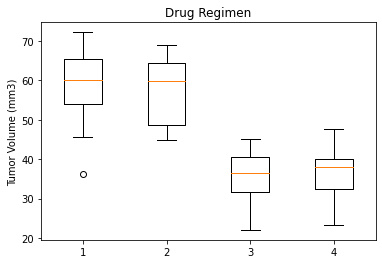

In [67]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#boxplot of 
#boxplot = mouse_study_clean_df.boxplot['Tumor Volume (mme)',(grid = False, rot=45, fontsize=15)]
#type(boxplot)

fig1, ax1 = plt.subplots()
ax1.set_title('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol)
plt.show()


## Line and Scatter Plots

In [70]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#Break ouf Capomulin
Capomulin = mouse_study_clean_df.loc[mouse_study_clean_df["Mouse ID"] == 'y793']
Capomulin.
plt.show()
# Create Time plot


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
115,y793,Capomulin,Male,17,17,0,45.000000,0
116,y793,Capomulin,Male,17,17,5,41.019913,0
117,y793,Capomulin,Male,17,17,10,41.630010,1
118,y793,Capomulin,Male,17,17,15,42.283665,1
119,y793,Capomulin,Male,17,17,20,40.716428,2
120,y793,Capomulin,Male,17,17,25,38.992734,2
121,y793,Capomulin,Male,17,17,30,35.726023,2
122,y793,Capomulin,Male,17,17,35,36.327870,2
123,y793,Capomulin,Male,17,17,40,31.475411,2
124,y793,Capomulin,Male,17,17,45,31.896238,2


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
#plt.scatter(df.Weight, df.postTestScore, s=df.age)

plt.scatter(Capomulin.iloc[:,4],(Capomulin.iloc[:,7])
plt.xlabel('Weight')
plt.ylabel('Average Tumoor Volume')
plt.show()


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Weight,Average Tumor Volume)